In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df = pd.read_excel("data/region_wise_sales.xlsx")

In [6]:
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [7]:
df.Region.unique()

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [9]:
df_apac = df[df.Region == 'APAC']
df_europe = df[df.Region == 'Europe']
df_americas = df[df.Region == 'Americas']

In [10]:
def get_lower_upper(data) :
    Q1, Q3 = data.Sales.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return lower, upper

In [14]:
lower, upper = get_lower_upper(df_europe)
lower , upper

(7306.875, 17665.875)

In [15]:
df_europe.describe()

,Year,Sales
count,12.0,12.000000
mean,2022.0,13147.583333
std,0.0,3549.568795
min,2022.0,9665.000000
25%,2022.0,11191.500000
50%,2022.0,12044.000000
75%,2022.0,13781.250000
max,2022.0,23000.000000


In [16]:
labels = df['Region'].unique()
labels

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [19]:
plot_data = [df['Sales'][df['Region'] == label].values for label in labels]
plot_data

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896]),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895]),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387])]

/var/folders/1d/w72pys2d2q58j17kf_kg6h300000gr/T/ipykernel_22214/4139079921.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data, labels=labels, vert=True, patch_artist=True)


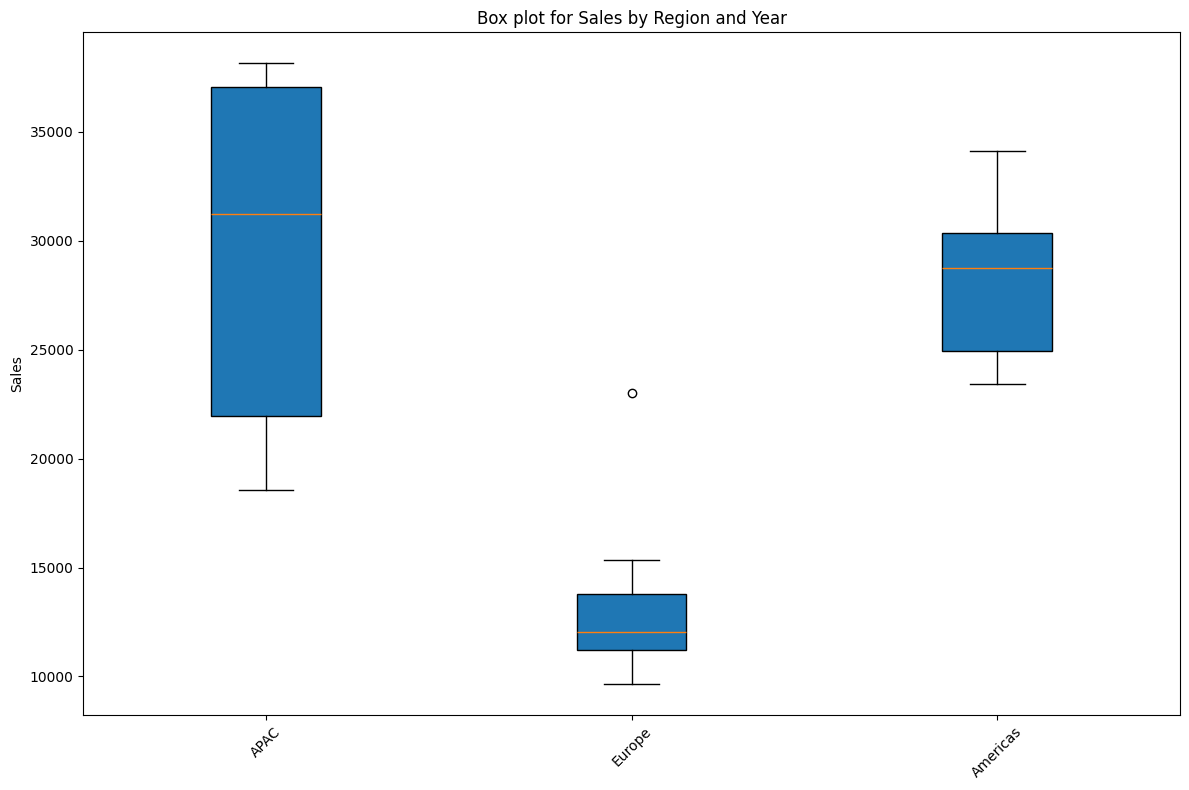

In [20]:
plt.figure(figsize=(12,8))
plt.boxplot(plot_data, labels=labels, vert=True, patch_artist=True)
plt.title("Box plot for Sales by Region and Year")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
